In [1]:
import sys                      # system tools 

import numpy as np              # numerical computing with arrays 
import pandas as pd             # dataframe as in R

import matplotlib.pyplot as plt # ploting 
import matplotlib as mpl        # ploting 
import seaborn as sns           # ploting 

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append(r"../code")
sys.path.append(r"../VehicleTrajectoryAnalytics")

import ccolors                  # colors from colorbrewer 

import matplotlibCharts         # own library for composite charts

import os                       # operating system io commands 
import itertools                # functonal programming tools 

import matplotlib 
%matplotlib inline

from vehicleTrajectoryAnalytics import VTAnalytics

In [32]:
%load_ext autoreload

In [33]:
%autoreload 2

In [3]:
start_time = np.datetime64('2005-04-13 17:00:00')
end_time   = np.datetime64('2005-04-13 17:30:00')

START_TIME = np.datetime64('2005-04-13 17:00:00')
END_TIME   = np.datetime64('2005-04-13 17:30:00')


In [2]:
ai2 = pd.read_hdf('../trajData/ai21.hdf', 'trajectories')
#ai2 = pd.read_hdf(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\ai21.hdf", "trajectories")

In [3]:
OUT_FOLDER = r"..\outputs\model"
OUT_FOLDER = os.path.join("..", 'outputs', 'model')

In [110]:
LCR_MAX_RATE = 72000 

In [5]:
ai2.columns

Index(['did', 'oid', 'ent', 'sectionId', 'laneIndex', 'xCoord', 'yCoord',
       'timeSta', 'speed', 'travelledDistance', 'acceleration', 'time',
       'laneChange', 'dist_along', 'dist_headway', 'precedingVeh', 'xCoordp',
       'yCoordp', 'dist_headway2', 'mdensity', 'spacebin', 'timebin'],
      dtype='object')

In [6]:
ai2.head()

,did,oid,ent,sectionId,laneIndex,xCoord,yCoord,timeSta,speed,travelledDistance,...,laneChange,dist_along,dist_headway,precedingVeh,xCoordp,yCoordp,dist_headway2,mdensity,spacebin,timebin
0,10363595,1021,1648,10237476,6,6042637.69,2134625.72,17999.2,7.12,1014.54,...,0,1596.281410,NaN,NaN,NaN,NaN,NaN,NaN,7,2005-04-13 17:00:00
1,10363595,1021,1649,10237476,6,6042637.38,2134627.77,17999.4,7.00,1015.17,...,0,1598.354599,NaN,NaN,NaN,NaN,NaN,NaN,7,2005-04-13 17:00:00
2,10363595,1021,1650,10237476,6,6042637.08,2134629.77,17999.6,6.80,1015.79,...,0,1600.376833,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:00:00
3,10363595,1021,1651,10237476,6,6042636.80,2134631.71,17999.8,6.56,1016.38,...,0,1602.336639,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:00:00
4,10363595,1021,1652,10237476,6,6042636.51,2134633.61,18000.0,6.58,1016.97,...,0,1604.258561,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:05:00


In [7]:
ai2.isnull().sum()

did                      0
oid                      0
ent                      0
sectionId                0
laneIndex                0
xCoord                   0
yCoord                   0
timeSta                  0
speed                    0
travelledDistance        0
acceleration             0
time                     0
laneChange               0
dist_along               0
dist_headway         63028
precedingVeh         63035
xCoordp              63035
yCoordp              63035
dist_headway2        63035
mdensity             63035
spacebin                 0
timebin                  0
dtype: int64

In [8]:
ai2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500474 entries, 0 to 1500473
Data columns (total 22 columns):
did                  1500474 non-null int64
oid                  1500474 non-null int64
ent                  1500474 non-null int64
sectionId            1500474 non-null int64
laneIndex            1500474 non-null int64
xCoord               1500474 non-null float64
yCoord               1500474 non-null float64
timeSta              1500474 non-null float64
speed                1500474 non-null float64
travelledDistance    1500474 non-null float64
acceleration         1500474 non-null float64
time                 1500474 non-null datetime64[ns]
laneChange           1500474 non-null int64
dist_along           1500474 non-null float64
dist_headway         1437446 non-null float64
precedingVeh         1437439 non-null float64
xCoordp              1437439 non-null float64
yCoordp              1437439 non-null float64
dist_headway2        1437439 non-null float64
mdensity          

In [9]:
ai2.oid.unique().shape

(2630,)

In [10]:
ai2.time.min(), ai2.time.max()

(Timestamp('2005-04-13 16:59:59.200000'),
 Timestamp('2005-04-13 17:29:59.800000'))

In [11]:


ai2 = ai2[(ai2.time >= start_time) & (ai2.time < end_time)]

In [12]:
ai2.time.min(), ai2.time.max()

(Timestamp('2005-04-13 17:00:00'), Timestamp('2005-04-13 17:29:59.800000'))

In [13]:
ai2['laneIndex'] = 8 - ai2['laneIndex']

In [14]:
def describe(var, numerical=True, decimals=1):
    
    count = int(var.shape[0])
    na    = int(var.isnull().sum())
    
    if numerical: 
        
        var2 = var.dropna().values 
        mean = np.mean(var2)
        std  = np.std(var2)
        
        min_ =  np.min(var2)   
        pct5 =  np.percentile(var2, 5) 
        pct25 = np.percentile(var2, 25)
        pct50 = np.percentile(var2, 50)
        pct75 = np.percentile(var2, 75) 
        pct95 = np.percentile(var2, 95)

        max_ = np.max(var2)

        values = [count,   na,    mean,   std,   min_,  pct5,   pct25,  pct50,   pct75,    pct95, max_]
        values = [np.round(v, decimals) for v in values]
        #values.insert(na, 0)
        #values.insert(count, 0)
        index = ['count', 'NA', 'mean', 'std', 'min', 'ptc5', 'pct25', 'pct50', 'ptc75', 'pct95', 'max']
        
        df = pd.DataFrame({'stats':values}, index=index)
        
        return df
    else:
        raise Exception("Not implemented yet")


In [15]:
describe(ai2.speed)

,stats
count,1499888.0
NA,0.0
mean,8.9
std,8.4
min,0.0
ptc5,0.6
pct25,4.2
pct50,7.1
ptc75,10.6
pct95,27.1


In [ ]:
describe(ai2.dist_along)

In [ ]:
fig, ax =plt.subplots(figsize=(15,10))

ai2.speed.hist(ax=ax, bins=np.arange(0,71,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5)
ax.set_title("Distribution of instantaneous speeds",fontsize=18)
ax.set_xlabel("speed (mph)",fontsize=16)
fig.tight_layout()
#fig.savefig(os.path.join(OUT_FOLDER, "inst speeds.png"))

In [ ]:
describe(ai2.acceleration)

In [ ]:
ax = ai2.acceleration.hist(bins=np.arange(-121.5,15.5,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5)
ax.set_title("Distribution of instantaneous   accelerations",fontsize=18)
ax.set_xlabel("acceleration (fpss)",fontsize=16)

In [ ]:
ax = ai2.acceleration.hist(bins=np.arange(-121.5,15.5,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5, log=True)
ax.set_title("Distribution of instantaneous   accelerations",fontsize=18)
ax.set_xlabel("acceleration (fpss)",fontsize=16)

# Calculate average trajectory speeds 

In [ ]:
ai2 = ai2.sort_values(['oid', 'time'])
tmp1 = (ai2.groupby('oid')[['timeSta', 'travelledDistance']]
        
        .first().reset_index()
        .rename(columns={'timeSta':'start', 'travelledDistance':'startDist'})
       )
tmp2 = (ai2.groupby('oid')[['timeSta', 'travelledDistance']]
        .last()
        .reset_index()
        .rename(columns={'timeSta':'end', 'travelledDistance':'endDist'})
       )
    
ai_times = pd.merge(tmp1, tmp2, on=['oid'])
#ai_times
ai_times['dur'] = ai_times.end - ai_times.start 
ai_times['dist'] = ai_times.endDist - ai_times.startDist 
ai_times['speed'] = (ai_times.dist / 1600.0) / (ai_times.dur / 3600.0)
ai_times.sort_values('dur', ascending=False, inplace=True)
#ai_times['dur']
ai_times.head()

In [ ]:
ai_times = ai_times.dropna()

In [ ]:
#plt.figure(figsize=(8.5 * 2,11 * 2))
fig = plt.figure(figsize=(15,10))

gs = mpl.gridspec.GridSpec(2, 1,height_ratios=[8, 1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])


matplotlibCharts.plotSingleHistLine(ax1, ai_times, 'speed', np.arange(0,52,1), lineParams={'label':'NGSIM', 'color':'grey'})

ax1.legend(fontsize=16)

minor_locator = mpl.ticker.AutoMinorLocator(10)
ax1.xaxis.set_minor_locator(minor_locator)

ax1.grid(b=True, which='major', color='white', lw=1)
ax1.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)
        
matplotlibCharts.myBoxPlot(ax2, ai_times, 'speed', 'grey', 
            10, axis_min=0, axis_max=52, mean_horizontal_label_shift=0.5)

ax1.set_title("Distribution of average vehicle speed (mph) in the NGSIM corridor", fontsize=18)
ax1.set_ylabel('Percentage', color='grey', fontsize=18)

fig.tight_layout()
#fig.savefig(os.path.join(OUT_FOLDER, "Average veh speeds.png"))

In [ ]:
ai2.groupby(['laneIndex'])['speed'].mean().reset_index()

## Bining for Heatmap and Traffic Flow calculations

In [16]:
LCR_TIME_BIN = 10 # seconds 
LCR_SPACE_BIN = 100 # in feet


ai2['spacebin'] = np.array(ai2.dist_along // LCR_SPACE_BIN, np.int)
ai2['timebin'] = pd.to_datetime(((ai2.time.astype(np.int64) // 
                                 (LCR_TIME_BIN * 1e9) ) * (LCR_TIME_BIN * 1e9) ))


In [17]:
ai2.timebin.unique().shape

(180,)

## Calculate the speed heatmap table 

In [18]:
ai_speed_hm = (ai2.groupby(['laneIndex', 'spacebin', 'timebin'])['speed']
                   .mean() )

ai_speed_hm = (ai_speed_hm.to_frame()
                          .reset_index() ) 

mi = pd.MultiIndex.from_product([sorted(ai2.laneIndex.unique()), 
                                 sorted(ai2.spacebin.unique()), 
                                 ai2.timebin.unique()], 
                                 names=['laneIndex', 'spacebin', 'timebin'])
mi = pd.DataFrame(index=mi)
mi.reset_index(inplace=True)


ai_speed_hm = ai_speed_hm.merge(mi, on=['laneIndex', 'spacebin', 'timebin'], how='right')
ai_speed_hm = ai_speed_hm.set_index(['laneIndex', 'spacebin', 'timebin']).unstack()

ai_speed_hm = ai_speed_hm.sort_index(level=[0,1], ascending=[True, True])


In [19]:
ai_speed_hm.head(10)

speed                      \
timebin            2005-04-13 17:00:00 2005-04-13 17:00:10   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  24.896774           29.591923   
          5                  28.678519           30.889474   
          6                  32.564211           31.907368   
          7                  34.120385           33.276538   
          8                  35.283667           34.994000   
          9                  37.278214           36.425185   

                                                            \
timebin            2005-04-13 17:00:20 2005-04-13 17:00:30   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  31.249062           32.481667   
          5                  32.093077           32.955000   
          6                  33.199706           33.871905   
          7                  34.025556           34.933696   
          8                  35.010571           35.901136   
          9                  36.129655           36.836667   

                                                            \
timebin            2005-04-13 17:00:40 2005-04-13 17:00:50   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  32.763529           33.262000   
          5                  33.609000           34.023810   
          6                  34.540714           34.519444   
          7                  35.520333           35.462500   
          8                  36.367812           36.467500   
          9                  37.235294           37.361579   

                                                            \
timebin            2005-04-13 17:01:00 2005-04-13 17:01:10   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  33.873600           34.565455   
          5                  34.526471           35.560000   
          6                  35.090312           36.012692   
          7                  35.980400           36.650000   
          8                  37.018261           37.169630   
          9                  37.736923           37.782692   

                                                            \
timebin            2005-04-13 17:01:20 2005-04-13 17:01:30   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  34.829583           34.682917   
          5                  35.377000           35.376389   
          6                  35.944074           36.071429   
          7                  36.632000           36.990000   
          8                  37.368182           37.800625   
          9                  38.182941           38.517308   

## Calculate the speed and density heatmap table

In [20]:
ai_hm = (ai2.groupby(['laneIndex', 'spacebin', 'timebin'])['speed']
                  .aggregate([np.mean, np.size]))

ai_hm = (ai_hm.reset_index()
              .rename(columns={'size':'density', 'mean':'speed'}) ) 

mi = pd.MultiIndex.from_product([sorted(ai2.laneIndex.unique()), 
                                 sorted(ai2.spacebin.unique()), 
                                 ai2.timebin.unique()], 
                                 names=['laneIndex', 'spacebin', 'timebin'])
mi = pd.DataFrame(index=mi)
mi.reset_index(inplace=True)
#
#
ai_hm = ai_hm.merge(mi, on=['laneIndex', 'spacebin', 'timebin'], how='right')
ai_hm = ai_hm.set_index(['laneIndex', 'spacebin', 'timebin'])


### the simulation time step is 0.2 seconds this is why I am multiplying by 5 below 
ai_hm['density'] = ai_hm['density'] * (5280 / LCR_SPACE_BIN) / (LCR_TIME_BIN * 5)

In [21]:
ai_hm.head()

speed  density
laneIndex spacebin timebin                                
1         4        2005-04-13 17:00:00  24.896774   32.736
                   2005-04-13 17:00:10  29.591923   27.456
                   2005-04-13 17:00:20  31.249062   33.792
                   2005-04-13 17:00:30  32.481667   31.680
                   2005-04-13 17:00:40  32.763529   17.952

In [ ]:
ai_hm.head()

In [26]:
ai_hm_mean = (ai_hm.groupby(ai_hm.density.values // 5 * 5)['speed'].aggregate([np.mean, np.size])
                      .reset_index()
                      .rename(columns={'index':'density', 'mean':'mean_speed'}))

ai_hm_mean.head(20)

,density,mean_speed,size
0,0.0,12.161250,8.0
1,5.0,39.693384,69.0
2,10.0,40.757270,204.0
3,15.0,40.106470,414.0
4,20.0,38.363366,644.0
5,25.0,37.967758,911.0
6,30.0,33.888203,679.0
7,35.0,25.459185,367.0
8,40.0,18.782062,363.0
9,45.0,13.905847,422.0


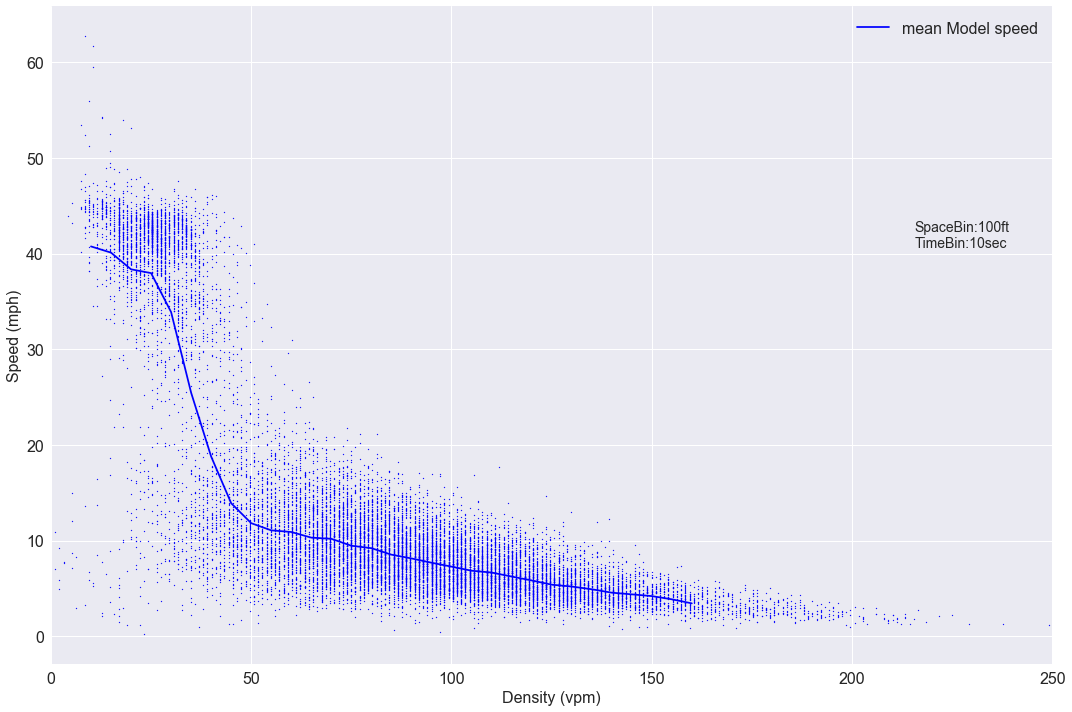

In [34]:
fig, ax1 = plt.subplots(figsize=(15,10))

grey_points = ax1.scatter(ai_hm.density, ai_hm.speed, s=1, color='blue', label=None)

ax1.set_xlim([0,250])
tmp = ai_hm_mean[ai_hm_mean['size'] > 100]
mean_line = ax1.plot(tmp.density, tmp.mean_speed, c='blue', label="mean Model speed")
ax1.legend(fontsize=16)

ax1.legend(fontsize=16)

ax1.set_ylabel("Speed (mph)", fontsize=16)
ax1.set_xlabel('Density (vpm)', fontsize=16)

#ax1.set_title("  Data", fontsize=18)
#fig.legend(handles=[grey_points, blue_points], labels=['NGSIM', "Model"], fontsize=18)
fig.text(0.85, 0.65, "SpaceBin:%dft\nTimeBin:%dsec" % (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=14)

fig.tight_layout()

#fig.savefig(os.path.join(OUT_FOLDER, "density vs speed all.png"))

In [32]:
mpl.rc('ytick', labelsize=16)
mpl.rc('xtick', labelsize=16)

0 0
0 1
1 0
1 1
2 0
2 1
3 0


/Users/michailxyntarakis/anaconda/envs/py36_2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.72,0.13,'SpaceBin:100ft\nTimeBin:10sec')

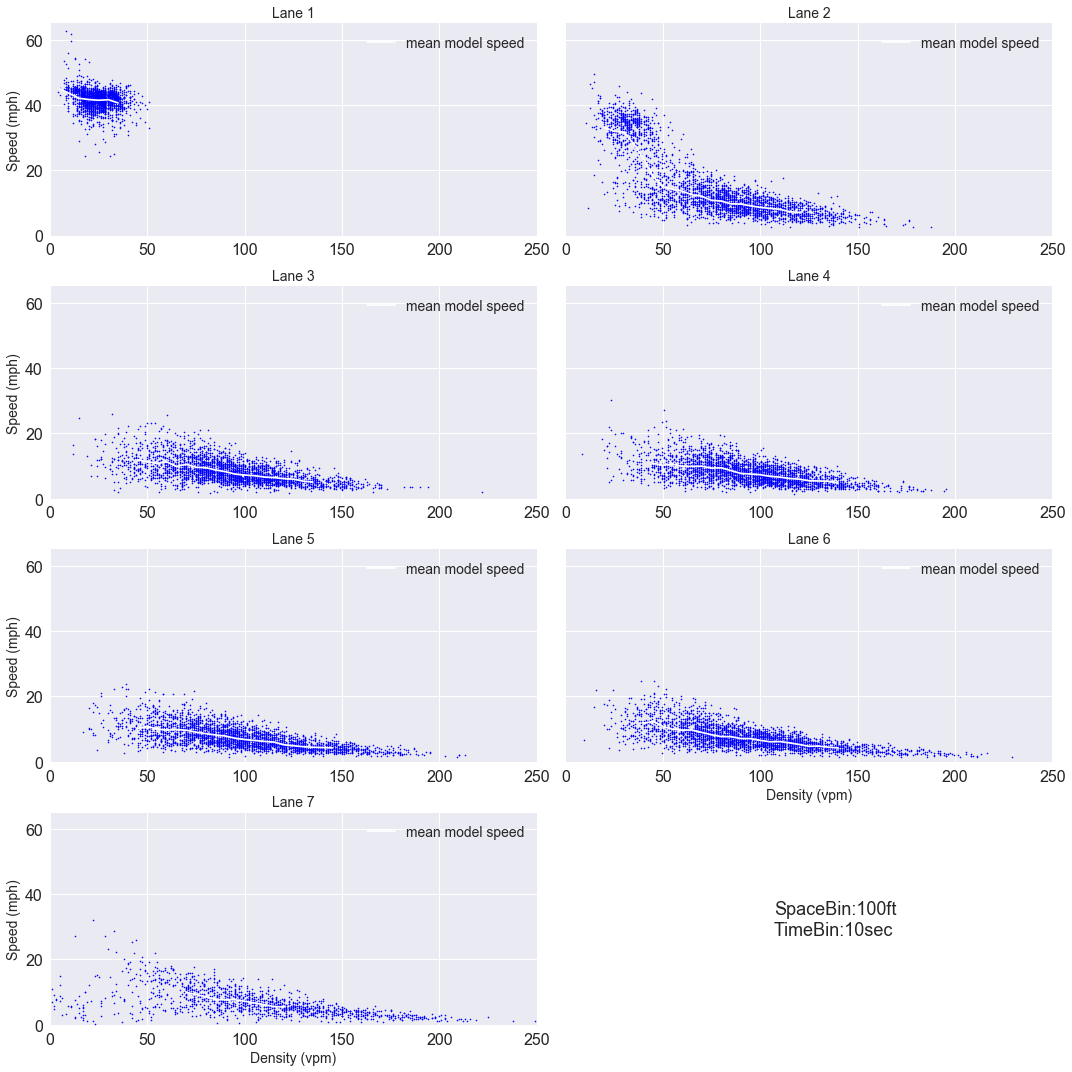

In [33]:
fig = plt.figure(figsize=(15, 15))

gs = mpl.gridspec.GridSpec(4, 2)

for laneNum in range(1, 8):
    
    i = (laneNum - 1) // 2
    j = (laneNum - 1) % 2 
    
    print(i,j)
    ax = plt.subplot(gs[i,j])
    
    tmp = ai_hm.loc[laneNum]
    
    
    ax.scatter(tmp.density, tmp.speed, s=1.5, color='blue', label=None)
    ax.set_xlim([0,250])
    ax.set_ylim([0,65])
    ax.set_title("Lane %d" % laneNum, fontsize=14)
    
    tmp_mean = (tmp.groupby(tmp.density.values // 5 * 5)['speed']
                      .aggregate([np.mean, np.size])
                      .reset_index()
                      .rename(columns={'index':'density', 'mean':'mean_spd'}))
    
    tmp_mean = tmp_mean[tmp_mean['size'] > 50]
    
    ax.plot(tmp_mean.density, tmp_mean.mean_spd, c='white', label='mean model speed')
    
    if j == 1:
        ax.set_yticklabels([])
        
    if j == 0:
        ax.set_ylabel("Speed (mph)", fontsize=14)
        
    ax.legend(fontsize=14)

plt.subplot(gs[3,0]).set_xlabel("Density (vpm)", fontsize=14)
plt.subplot(gs[2,1]).set_xlabel("Density (vpm)", fontsize=14)

fig.tight_layout()
fig.text(0.72, 0.13, "SpaceBin:%dft\nTimeBin:%dsec" % (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=18)
#fig.savefig(os.path.join(OUT_FOLDER, "  density vs speed per lane.png"))

In [36]:
OUT_FOLDER = os.path.join("..", "outputs", "ngI80_5to530")

In [37]:
start_time = np.datetime64('2005-04-13 17:00:00')
end_time   = np.datetime64('2005-04-13 17:30:00')

LCR_MAX_RATE = 72000 

In [116]:
def prepareNGISIMData(fName1, fName2): 
    
    """This function takes raw NGSIM data from 5 to 5:30 PM and prepares them for analysis
    """
    
    
    
    colNames = ['VehID', 'FrameID', 'TotalFrames', 'GlobalTime', 'locX', 'locY', 'globX', 
                'globY', 'vehLength', 'vehWidth', 'vehClass', 'vehSpeed', 'vehAcceleration', 'lane', 
               'precedingVeh', 'followingVeh', 'spacing', 'headway']
    
    tmp1 = pd.read_csv(fName1, 
                     header=None, names=colNames, delim_whitespace=True)

    tmp2 = pd.read_csv(fName2, 
                     header=None, names=colNames, delim_whitespace=True)

    ng = pd.concat([tmp1, tmp2])
    
    
    #create a datetime variable 
    result = [] 
    for t in ng.GlobalTime.values: 
        t = np.datetime64(int(t),'ms') - np.timedelta64(7,'h')
        result.append(t)
    ng['_time'] = result
    
    #create a new vehicle id because the one defined in the
    #raw data is wrong 
    newVehID = (ng.groupby(['VehID', 'TotalFrames', 
                            'vehLength'])['locY'].mean()
                        .to_frame()
                        .reset_index()
                        .reset_index())
    newVehID.rename(columns={'index':'_vid'}, inplace=True)
    newVehID.drop(['vehLength', 'locY'], axis=1, inplace=True)
    newVehID['_vid']  = newVehID['_vid'] + 1

    ng = ng.merge(newVehID, on=['VehID', 'TotalFrames'])
    
    #limit the dataset to 5 to 5:30 
    ng  = ng[(ng._time >= start_time) & (ng._time < end_time)]
    
    
    #reclculate the preceding and following vehicle ids 
    ng = ng.sort_values(['lane', '_time', 'locY'], ascending=[True, True, True])
    ng.index = np.arange(ng.shape[0])

    ng['_prV'] = ng._vid.shift(-1)
    ng.loc[ng.lane != ng.lane.shift(-1), '_prV'] =  np.nan 
    ng.loc[ng._time != ng._time.shift(-1), '_prV'] =  np.nan 

    ng['_flV'] = ng._vid.shift(1)
    ng.loc[ng.lane != ng.lane.shift(1), '_flV'] =  np.nan 
    ng.loc[ng._time != ng._time.shift(1), '_flV'] =  np.nan 
    
    #
    ng['_spd']  = ng.vehSpeed * 3600 / 5280  # _spd in miles per hour 
    ng['_acc']  = ng.vehAcceleration         # _acc is in feet per second squared 
    ng['_locy'] = ng.locY  #location along the Y axis in feet 
    ng['_vlen'] = ng.vehLength # vehicle length in feet  
    ng['_lane'] = ng.lane 
  
    #"_prV" is the preceding vehicle 
    #"_flV" is the following vehicle 
    
    return ng 

In [117]:
fName1 = "../trajData/0500pm-0515pm/trajectories-0500-0515.txt"
fName2 = "../trajData/0515pm-0530pm/trajectories-0515-0530.txt"

In [118]:
ng = prepareNGISIMData(fName1, fName2)

In [119]:
ng.head()

,VehID,FrameID,TotalFrames,GlobalTime,locX,locY,globX,globY,vehLength,vehWidth,...,headway,_time,_vid,_prV,_flV,_spd,_acc,_locy,_vlen,_lane
0,416,331,452,1113436800000,7.122,81.113,6042828.334,2133149.138,14.8,6.4,...,2.94,2005-04-13 17:00:00,351,318.0,NaN,12.422727,-0.89,81.113,14.8,1
1,389,331,417,1113436800000,4.509,134.707,6042819.118,2133202.070,16.4,5.9,...,3.01,2005-04-13 17:00:00,318,313.0,351.0,11.304545,-11.20,134.707,16.4,1
2,386,331,425,1113436800000,5.530,184.540,6042813.998,2133251.465,19.3,8.5,...,3.68,2005-04-13 17:00:00,313,296.0,318.0,16.363636,11.20,184.540,19.3,1
3,371,331,437,1113436800000,5.428,272.775,6042803.097,2133339.068,15.3,6.9,...,1.99,2005-04-13 17:00:00,296,278.0,313.0,18.204545,-5.77,272.775,15.3,1
4,357,331,438,1113436800000,4.792,325.946,6042796.086,2133391.755,16.4,5.9,...,3.21,2005-04-13 17:00:00,278,262.0,296.0,17.925000,1.05,325.946,16.4,1


In [120]:
ng.columns

Index(['VehID', 'FrameID', 'TotalFrames', 'GlobalTime', 'locX', 'locY',
       'globX', 'globY', 'vehLength', 'vehWidth', 'vehClass', 'vehSpeed',
       'vehAcceleration', 'lane', 'precedingVeh', 'followingVeh', 'spacing',
       'headway', '_time', '_vid', '_prV', '_flV', '_spd', '_acc', '_locy',
       '_vlen', '_lane'],
      dtype='object')

In [90]:
%%HTML 
<table border="1" class="dataframe">   <thead>     <tr style="text-align: right;">       <th></th>       <th>name</th>       <th>Description</th>       <th>Units</th>     </tr>   </thead>   <tbody>     <tr>       <th>0</th>       <td>Vehicle ID</td>       <td>Vehicle identification number (ascending by ti...</td>       <td>Number</td>     </tr>     <tr>       <th>1</th>       <td>Frame ID</td>       <td>Frame Identification number (ascending by star...</td>       <td>1/10 of a second</td>     </tr>     <tr>       <th>2</th>       <td>Total Frames</td>       <td>Total number of frames in which the vehicle ap...</td>       <td>1/10 of a second</td>     </tr>     <tr>       <th>3</th>       <td>Global Time (Epoch Time)</td>       <td>Elapsed time since Jan 1, 1970.</td>       <td>Milliseconds</td>     </tr>     <tr>       <th>4</th>       <td>Local X</td>       <td>Lateral (X) coordinate of the front center of ...</td>       <td>Feet</td>     </tr>     <tr>       <th>5</th>       <td>Local Y</td>       <td>Longitudinal (Y) coordinate of the front cente...</td>       <td>Feet</td>     </tr>     <tr>       <th>6</th>       <td>Global X</td>       <td>X Coordinate of the front center of the vehicl...</td>       <td>Feet</td>     </tr>     <tr>       <th>7</th>       <td>Global Y</td>       <td>Y Coordinate of the front center of the vehicl...</td>       <td>Feet</td>     </tr>     <tr>       <th>8</th>       <td>Vehicle Length</td>       <td>Length of vehicle</td>       <td>Feet</td>     </tr>     <tr>       <th>9</th>       <td>Vehicle Width</td>       <td>Width of vehicle</td>       <td>Feet</td>     </tr>     <tr>       <th>10</th>       <td>Vehicle Class</td>       <td>Vehicle type: 1 - motorcycle, 2 - auto, 3 - truck</td>       <td>Text</td>     </tr>     <tr>       <th>11</th>       <td>Vehicle Velocity</td>       <td>Instantaneous velocity of vehicle</td>       <td>Feet/Second</td>     </tr>     <tr>       <th>12</th>       <td>Vehicle Acceleration</td>       <td>Instantaneous acceleration of vehicle</td>       <td>Feet/Second Square</td>     </tr>     <tr>       <th>13</th>       <td>Lane Identification</td>       <td>Current lane position of vehicle. Lane 1 is fa...</td>       <td>Number</td>     </tr>     <tr>       <th>14</th>       <td>Preceding Vehicle</td>       <td>Vehicle Id of the lead vehicle in the same lan...</td>       <td>Number</td>     </tr>     <tr>       <th>15</th>       <td>Following Vehicle</td>       <td>Vehicle Id of the vehicle following the subjec...</td>       <td>Number</td>     </tr>     <tr>       <th>16</th>       <td>Spacing (Space Headway)</td>       <td>Spacing provides the distance between the fron...</td>       <td>Feet</td>     </tr>   </tbody> </table>

,name,Description,Units
0,Vehicle ID,Vehicle identification number (ascending by ti...,Number
1,Frame ID,Frame Identification number (ascending by star...,1/10 of a second
2,Total Frames,Total number of frames in which the vehicle ap...,1/10 of a second
3,Global Time (Epoch Time),"Elapsed time since Jan 1, 1970.",Milliseconds
4,Local X,Lateral (X) coordinate of the front center of ...,Feet
5,Local Y,Longitudinal (Y) coordinate of the front cente...,Feet
6,Global X,X Coordinate of the front center of the vehicl...,Feet
7,Global Y,Y Coordinate of the front center of the vehicl...,Feet
8,Vehicle Length,Length of vehicle,Feet
9,Vehicle Width,Width of vehicle,Feet


In [149]:
mpl.rc('ytick', labelsize=18)
mpl.rc('xtick', labelsize=18)

In [ ]:
np.flo

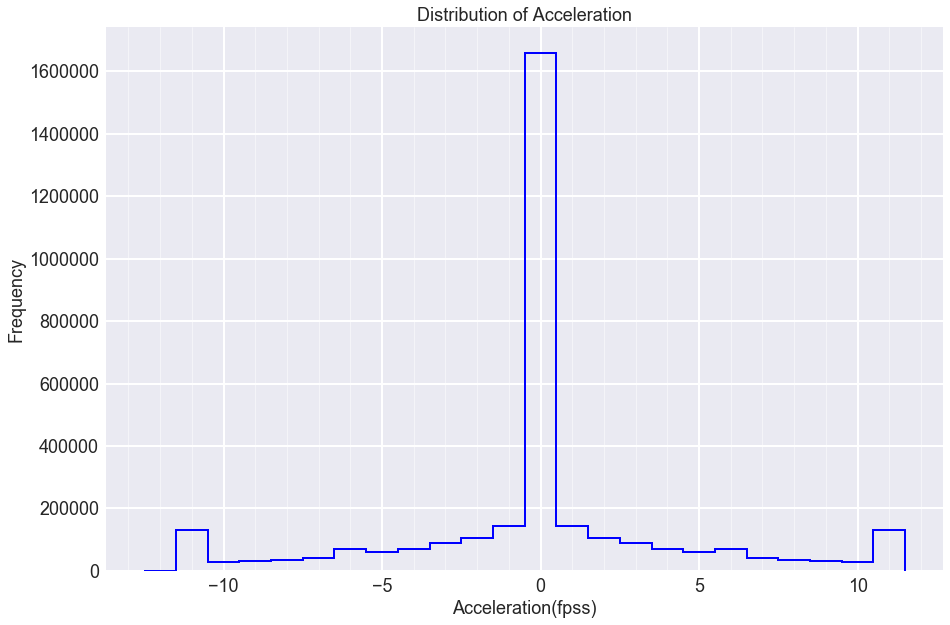

In [163]:
def getAccelerationDistribution(df, ax):
    
    bins = np.arange(np.floor(df._acc.min()) - 0.5, np.ceil(df._acc.max()) + 0.5, 1)
    
    ax.hist(df._acc, bins=bins, color='blue', histtype='step', linewidth=2) 
    
    ax.set_title("Distribution of Acceleration", fontsize=18)
    ax.set_xlabel("Acceleration(fpss)", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    
    minor_locator = matplotlib.ticker.AutoMinorLocator(5)
    ax.xaxis.set_minor_locator(minor_locator)
    
    ax.grid(b=True, which='major', color='white', lw=2)
    ax.grid(b=True, which='minor', color='white', lw=0.5, alpha=1.0)
    
fig, ax = plt.subplots(figsize=(15,10))
getAccelerationDistribution(ng, ax)  

In [ ]:
ng._spd

(array([237966,  73103,  85603, 213843, 138592, 149276, 260076, 137222,
        120903, 131298, 228762, 115774, 107830, 213879,  96167,  88718,
         94990, 132183,  59732,  57834,  93738,  42709,  35801,  57505,
         28388,  23227,  22636,  42552,  19285,  16375,  26944,  14222,
         12799,  12698,  17014,   8385,   7886,   9368,   5142,   3785,
          4336,   1925,   1440,   1116,   1105,    749,    533,    515,
           254,    248,    196,    224,    104,     64,     61,     57,
            43,     43,     18,      9,     21,      3,      6,     11]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  6

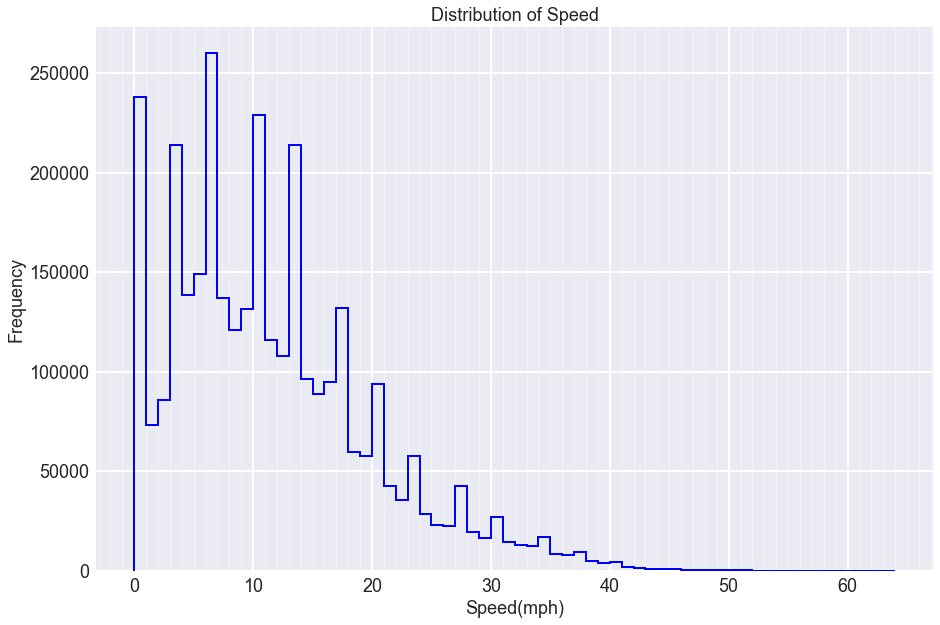

In [187]:
def getSpeedDistribution(df, ax):
    
    bins = np.arange(np.floor(df._spd.min()), np.ceil(df._spd.max()), 1)
    
    ax.hist(df._spd, bins=bins, color='blue', histtype='step', linewidth=2) 
    
    minor_locator = matplotlib.ticker.AutoMinorLocator(10)
    ax.xaxis.set_minor_locator(minor_locator)
    
    ax.set_title("Distribution of Speed", fontsize=18)
    ax.set_xlabel("Speed(mph)", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    
    ax.grid(b=True, which='major', color='white', lw=2)
    ax.grid(b=True, which='minor', color='white', lw=0.5, alpha=1.0)
    
    return np.histogram(df._spd, bins=bins)
    
fig, ax = plt.subplots(figsize=(15,10))
getSpeedDistribution(ng, ax) 

In [154]:
ng._spd.describe()

count    3.257363e+06
mean     1.167185e+01
std      8.424788e+00
min      0.000000e+00
25%      5.454545e+00
50%      1.022727e+01
75%      1.649318e+01
max      6.497727e+01
Name: _spd, dtype: float64

In [218]:
def calculateCorridorTravelTimes(df):
    
    df = df.sort_values(['_vid', '_time'])
    tmp1 = (df.groupby('_vid')[['_time', '_locy']]
            .first().reset_index()
            .rename(columns={'_time':'start', '_locy':'startDist'}))
    
    tmp2 = (df.groupby('_vid')[['_time', '_locy']]
            .last().reset_index()
            .rename(columns={'_time':'end', '_locy':'endDist'}))
    
    cor_times = pd.merge(tmp1, tmp2, on=['_vid'])
    
    cor_times['dur'] = (cor_times.end - cor_times.start).dt.total_seconds() 
    cor_times['dist'] = cor_times.endDist - cor_times.startDist 
    cor_times['_spd'] = (cor_times.dist / 5280.0) / (cor_times.dur / 3600.0)
    
    return cor_times 

In [219]:
cor_times = calculateCorridorTravelTimes(ng)

In [220]:
cor_times.head()

,_vid,start,startDist,end,endDist,dur,dist,_spd
0,1,2005-04-13 17:13:46.200,63.998,2005-04-13 17:15:41.400,1641.903,115.2,1577.905,9.338926
1,2,2005-04-13 17:13:37.100,65.998,2005-04-13 17:15:35.700,1639.819,118.6,1573.821,9.047722
2,3,2005-04-13 17:12:45.600,64.469,2005-04-13 17:15:37.700,1640.749,172.1,1576.280,6.244837
3,4,2005-04-13 17:13:30.700,65.090,2005-04-13 17:15:23.700,1641.602,113.0,1576.512,9.512341
4,5,2005-04-13 17:14:35.300,62.546,2005-04-13 17:15:16.300,1640.002,41.0,1577.456,26.232639


(array([  2,   0,   0,   0,  20, 191, 258, 225, 144, 209, 299, 358, 248,
        189, 211, 157, 105,  67,  79,  37,  19,  35,  25,  29,  59,  74,
         85,  79,  65,  66,  57,  44,  52,  40,  17,  33,  14,   7,   4,
          5,   5,   0,   1,   4,   3,   1,   1,   0,   1,   1]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.]))

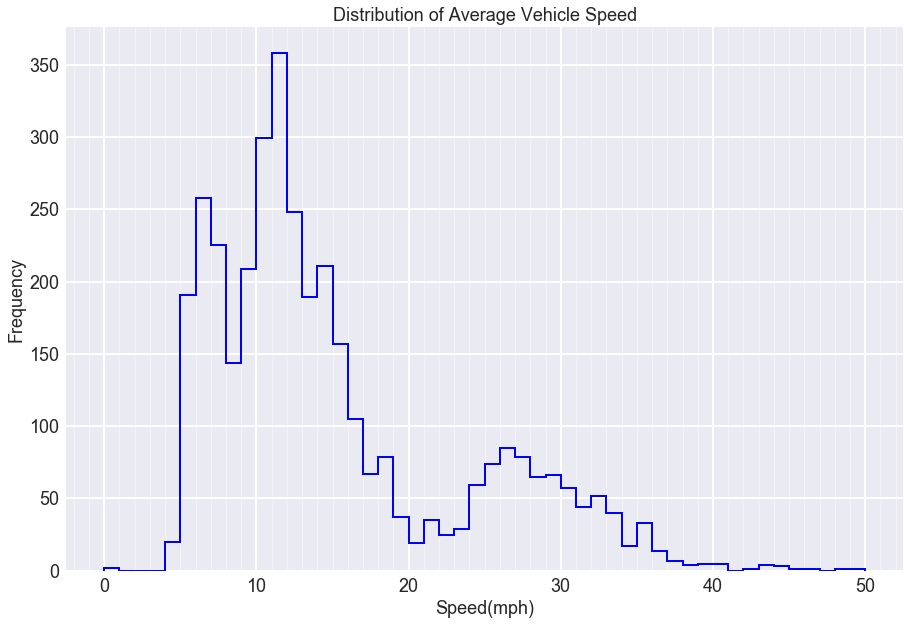

In [224]:
def plotMeanCorridorSpeedDistribtution(df, ax):
    """
    '_vid', 'start', 'startDist', 'end', 'endDist', 'dur', 'dist', 'speed'], dtype='object'
    """
    
    bins = np.arange(np.floor(df._spd.min()),
                     np.ceil(df._spd.max()), 1)
    
    ax.hist(df._spd, bins=bins, color='blue', histtype='step', linewidth=2) 
    
    minor_locator = matplotlib.ticker.AutoMinorLocator(10)
    ax.xaxis.set_minor_locator(minor_locator)
    
    ax.set_title("Distribution of Average Vehicle Speed", fontsize=18)
    ax.set_xlabel("Speed(mph)", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    
    ax.grid(b=True, which='major', color='white', lw=2)
    ax.grid(b=True, which='minor', color='white', lw=0.5, alpha=1.0)
    
    return np.histogram(df._spd, bins=bins)

fig, ax = plt.subplots(figsize=(15,10))
plotMeanCorridorSpeedDistribtution(cor_times, ax) 

In [227]:
ng.columns

Index(['VehID', 'FrameID', 'TotalFrames', 'GlobalTime', 'locX', 'locY',
       'globX', 'globY', 'vehLength', 'vehWidth', 'vehClass', 'vehSpeed',
       'vehAcceleration', 'lane', 'precedingVeh', 'followingVeh', 'spacing',
       'headway', '_time', '_vid', '_prV', '_flV', '_spd', '_acc', '_locy',
       '_vlen', '_lane'],
      dtype='object')

In [231]:
def calculateSpaceMeanSpeedAndDensity(df, time_bin, space_bin):
    
    """time_bin in seconds 
    space_bin in feet """

    df['_spacebin'] = np.array(df._locy // space_bin, np.int)
    df['_timebin'] = pd.to_datetime(((ng._time.astype(np.int64) // 
                                     (time_bin * 1e9) ) * (time_bin * 1e9) ))
    
    df_hm = (df.groupby(['_lane', '_spacebin', '_timebin'])['_spd']
                      .aggregate([np.mean, np.size]))

    df_hm = (df_hm.reset_index()
                  .rename(columns={'size':'density', 'mean':'speed', '_lane':'_lane'}) ) 

    mi = pd.MultiIndex.from_product([sorted(df._lane.unique()), 
                                     sorted(df._spacebin.unique()), 
                                     df._timebin.unique()], 
                                     names=['_lane', '_spacebin', '_timebin'])
    mi = pd.DataFrame(index=mi)
    mi.reset_index(inplace=True)
    #
    #
    df_hm = df_hm.merge(mi, on=['_lane', '_spacebin', '_timebin'], how='right')
    df_hm = df_hm.set_index(['_lane', '_spacebin', '_timebin'])


    ### the simulation time step is 0.1 seconds this is why I am multiplying by 10 below 
    ##TODO change the 10 
    df_hm['density'] = df_hm['density'] * (5280 / space_bin) / (time_bin * 10)
    
    return df_hm 


In [233]:
ng_hm = calculateSpaceMeanSpeedAndDensity(ng, 60, 150)

In [234]:
ng_hm.head()

speed    density
_lane _spacebin _timebin                                 
1     0         2005-04-13 17:00:00  21.488340  44.997333
                2005-04-13 17:01:00  28.606413  32.560000
                2005-04-13 17:02:00  39.319491  16.192000
                2005-04-13 17:03:00  30.182176  29.040000
                2005-04-13 17:04:00  28.441533  32.032000

In [260]:
def plotTrajectories(df, ax, lane, start_time, 
                     end_time, start_dist, end_dist, point_size=0.5):
    """

    """
    
    #select the trajectories to plot based on inputs 
    tmp = df[df._lane == lane]
    tmp = tmp[tmp._time >= start_time]
    tmp = tmp[tmp._time <= end_time]
    tmp = tmp[tmp._locy >= start_dist]
    tmp = tmp[tmp._locy <= end_dist]
  
    if tmp.shape[0] == 0:
        raise ValueError("Nothing to plot")
    
    rect = 0.06,0.06,0.90,0.9
    ax = fig.add_axes(rect)
    fig.add_axes(ax)

    #define the coloring scheme for the points 
    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    colors2 = ['#e31a1c','#fd8d3c', '#fecc5c','#ffffcc','#a1dab4','#41b6c4','#225ea8', '#000000']
    cmap = mpl.colors.ListedColormap(colors2) 
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    #define the color of the points 
    point_colors = tmp._spd.apply(lambda spd:colors2[int(spd // 10)]).values
    
    #x axis is the seconds from start time 
    times = (tmp._time - start_time).dt.total_seconds().values
    
    #y axis is the location along the corridor
    locations = tmp._locy.values 
    
    ax.scatter(times, locations, c=point_colors, s=point_size)
    ax.scatter(times[0],   locations[0], c=point_colors[0], s=point_size*8)
    ax.scatter(times[-1], locations[-1], c=point_colors[-1], s=point_size*8)
    
    
    ax.set_facecolor('white')
    ax.set_xlabel("Time in seconds from %s" % str(start_time), fontsize=18)
    ax.set_ylabel("Distance from Starting point %.1f (feet)" % start_dist,
                  fontsize=18)
    
    ax.set_xlim([times.min(), times.max()])
    ax.set_ylim([locations.min(), locations.max()])
    
    cmax = fig.add_axes([0.96, 0.1, 0.02, 0.8])
    mpl.colorbar.ColorbarBase(ax=cmax, cmap=cmap, norm=norm, boundaries=bounds) 

    ax.set_axisbelow(True)
    ax.grid(color='grey', lw=1, linestyle='dashed', alpha=0.2)
    
    

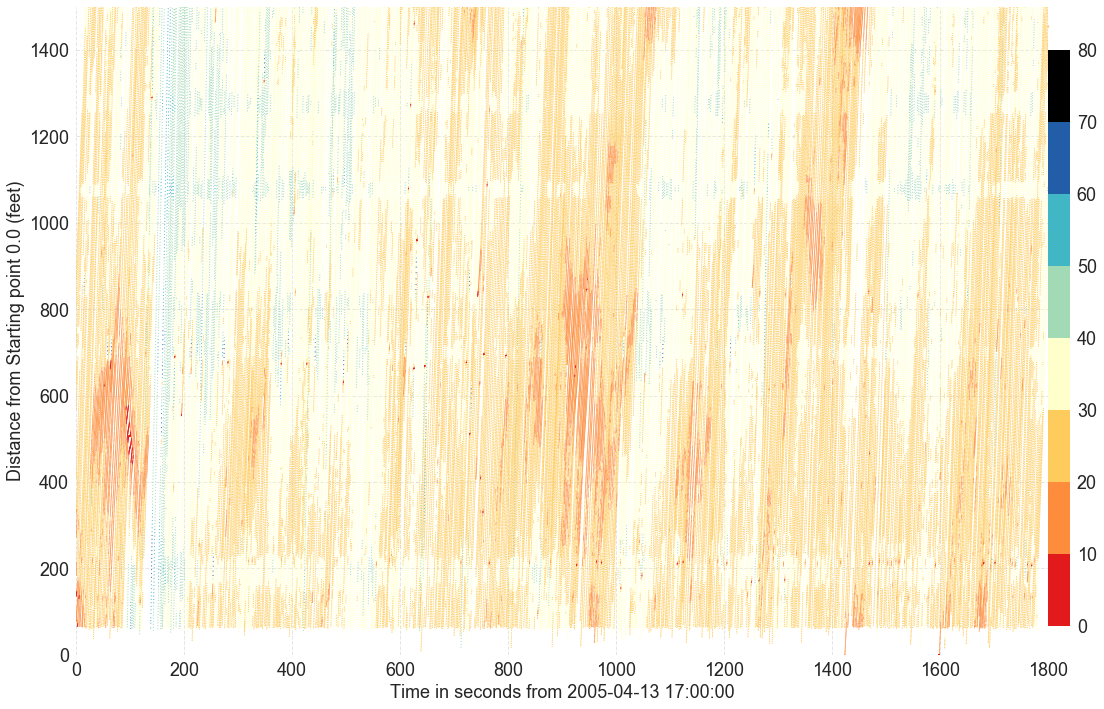

In [262]:
fig, ax = plt.subplots(figsize=(15,10))
plotTrajectories(ng, ax, 1, start_time, end_time, 0, 1500)

In [276]:
def calculateAccelerationJerk(df):
    """returns a new dataset with jerk values for a time step of 1 second"""
    
    df = df.sort_values(['_vid', '_time'])

    result = [] 
    for VehId, group in df.groupby('_vid'):

        tmp2 = (group[['_time', '_acc', '_spd',  '_locy']]
               .set_index('_time')
               .resample('1s')
               .mean()
               .reset_index()
               )

        tmp2['_vid'] = VehId

        tmp2['_jerk'] = tmp2._acc.shift(-1) - tmp2._acc
        result.append(tmp2)

    df1s = pd.concat(result)
    df1s = df1s.dropna()
    
    return df1s 

In [277]:
ng_jerk = calculateAccelerationJerk(ng)

In [278]:
ng_jerk.head()

,_time,_acc,_spd,_locy,_vid,_jerk
0,2005-04-13 17:13:46,-0.46625,6.067330,66.873125,1,1.18925
1,2005-04-13 17:13:47,0.72300,6.281591,74.729500,1,-4.79300
2,2005-04-13 17:13:48,-4.07000,5.573864,84.060400,1,3.01700
3,2005-04-13 17:13:49,-1.05300,3.210000,90.270100,1,5.48200
4,2005-04-13 17:13:50,4.42900,4.172727,95.293000,1,-8.21800


(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 22755,  7661,  9194, 20088, 14852,
        15193, 24203, 14982, 13107, 13927, 21384, 11782, 11726, 19640,
        10865,  9122, 10646, 11379,  6384]),
 array([-22., -21., -20., -19., -18., -17., -16., -15., -14., -13., -12.,
        -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
          0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.]))

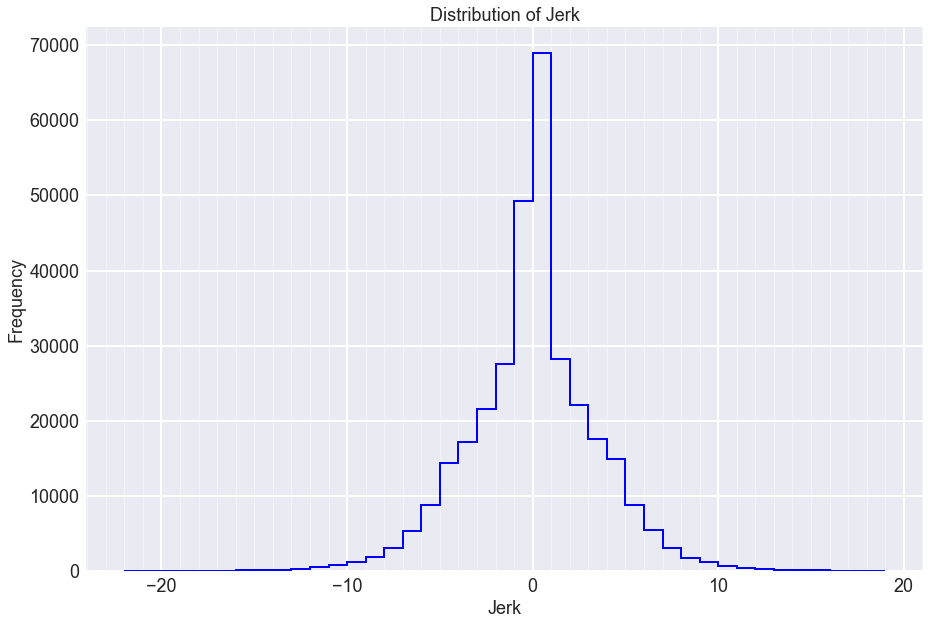

In [281]:
def plotJerkDistribution(df, ax):
    
    
    bins = np.arange(np.floor(df._jerk.min()),
                     np.ceil(df._jerk.max()), 1)
    
    ax.hist(df._jerk, bins=bins, color='blue', 
            histtype='step', linewidth=2) 
    
    minor_locator = matplotlib.ticker.AutoMinorLocator(10)
    ax.xaxis.set_minor_locator(minor_locator)
    
    ax.set_title("Distribution of Jerk", fontsize=18)
    ax.set_xlabel("Jerk", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    
    ax.grid(b=True, which='major', color='white', lw=2)
    ax.grid(b=True, which='minor', color='white', lw=0.5, alpha=1.0)
    
    return np.histogram(df._spd, bins=bins)

fig, ax = plt.subplots(figsize=(15,10))
plotJerkDistribution(ng_jerk, ax)

In [282]:
def getJerkDistribution(df):
    
    bins_ = np.arange(np.floor(df._jerk.min()),
                     np.ceil(df._jerk.max()), 1)
    
    hist, bins = np.histogram(df._jerk, 
            bins=bins_)

    jerk_freq = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
    labels = ["%.1f" % ((i+j)/2) for i,j in zip(bins[:], bins[1:])]
    jerk_freq.index = labels

    jerk_freq['Percentage'] = jerk_freq['freq'] / df.shape[0] * 100
    jerk_freq.index.name = 'bin center'
    
    return jerk_freq 

In [283]:
getJerkDistribution(ng_jerk)

,freq,Percentage
bin center,,
-21.5,1,0.000307
-20.5,0,0.000000
-19.5,0,0.000000
-18.5,5,0.001537
-17.5,12,0.003689
-16.5,25,0.007686
-15.5,51,0.015679
-14.5,109,0.033509
-13.5,167,0.051340


In [291]:
def calculateARMS(df, speedbin=5):
    """Calculates ARMS for each speed bin"""
    result = [] 

    speedBins = np.array(df._spd, np.int) // speedbin * speedbin 
    for sbin, group in df.groupby(speedBins):

        arms = np.sqrt(np.sum(group._acc.dropna().values ** 2) / group.shape[0]) * 0.303

        result.append((sbin, arms, group.shape[0]))

    arms = pd.DataFrame(result, columns=['_spd', '_arms', 'n'])
    
    return arms 

In [293]:
ng_arms = calculateARMS(ng, 2)
ng_arms.head()

,_spd,_arms,n
0,0,0.869007,311069
1,2,1.090501,299446
2,4,1.423279,287868
3,6,1.183857,397298
4,8,1.529331,252201


In [295]:
def plotARMS(df, ax):
    
    ax.plot(df._spd, df._arms, color='blue', lw=2)
        
    ax.set_ylabel('Acceleration Root Mean Squared', fontsize=18)
    ax.set_xlabel("Speed (mph)", fontsize=18)

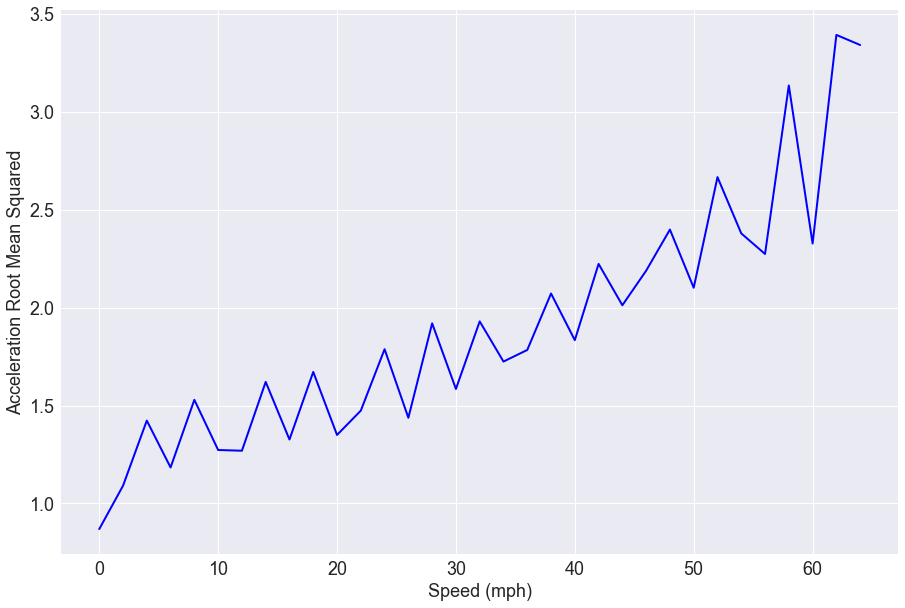

In [296]:
fig, ax = plt.subplots(figsize=(15,10))
plotARMS(ng_arms, ax)

In [ ]:
def getAccelerationDistribution(df, step):
    """Return a table of the acceleration distribution of the given time step
    """
    
    hist, bins = np.histogram(ng1s.vehAcceleration, np.arange(-21.5, 11.5, 1))
    
    acc_freq = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
    labels = ["%.1f <= acc < %.1f" % (i, i+1) for i in bins[:-1]]
    acc_freq.index = labels

    acc_freq['ngRe_Percentage'] = acc_freq['freq'] / ng1s.shape[0] * 100
    acc_freq.to_clipboard()
    acc_freq.to_csv(os.path.join(OUT_FOLDER, "Acceleration.csv"))
    acc_freq.head()

In [303]:
start_time, end_time

(Timestamp('2005-04-13 17:00:00'), Timestamp('2005-04-13 17:29:59.900000'))

In [6]:
from vehicleTrajectoryAnalytics import VTAnalytics

# Analysis 

In [86]:
ng = VTAnalytics.readNGISIMData("../trajData/trajectories 0500-0530.txt", 
                               start_time=start_time, end_time=end_time)

In [87]:
ai = VTAnalytics.readModelData("../trajData/ai21.hdf",
                              start_time=start_time, end_time=end_time)

In [6]:
ai.df.shape

(1499888, 35)

In [7]:
ng.df.shape

(3256052, 32)

In [8]:
ng.df_macro.head()

speed  density
_lane _spacebin _timebin                               
1     0         2005-04-13 17:00:30  29.188636    3.168
                2005-04-13 17:01:00  24.381818    4.224
                2005-04-13 17:01:50  45.565909    1.056
                2005-04-13 17:03:30  26.618182    5.280
                2005-04-13 17:05:00  30.027273    1.056

In [9]:
ai.df_macro.head()

speed  density
_lane _spacebin _timebin                               
1     8         2005-04-13 17:00:00  23.537000   21.120
                2005-04-13 17:00:10  29.025556   19.008
                2005-04-13 17:00:20  30.840000   27.456
                2005-04-13 17:00:30  32.178000   21.120
                2005-04-13 17:00:40  32.228000   10.560

../VehicleTrajectoryAnalytics\vehicleTrajectoryAnalytics.py:603: RuntimeWarning: invalid value encountered in floor_divide
  speed_groups = self.df_macro.density.values // speed_step * speed_step


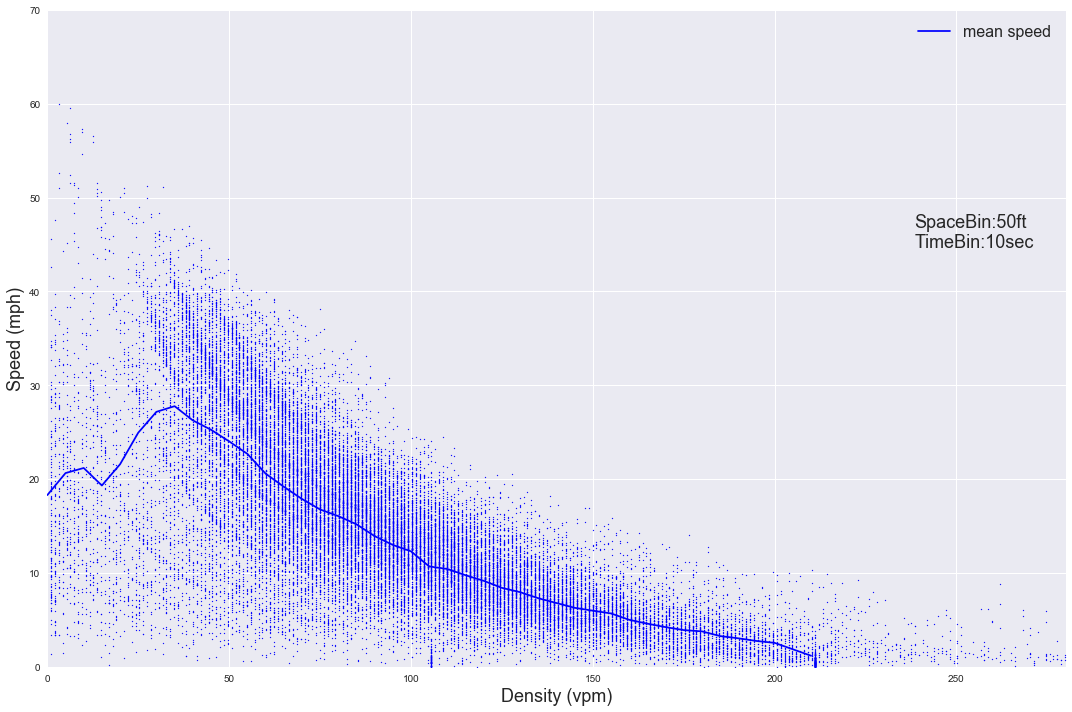

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ng.plotSpeedVsDensity(fig, ax, max_density=280)

../VehicleTrajectoryAnalytics\vehicleTrajectoryAnalytics.py:603: RuntimeWarning: invalid value encountered in floor_divide
  speed_groups = self.df_macro.density.values // speed_step * speed_step


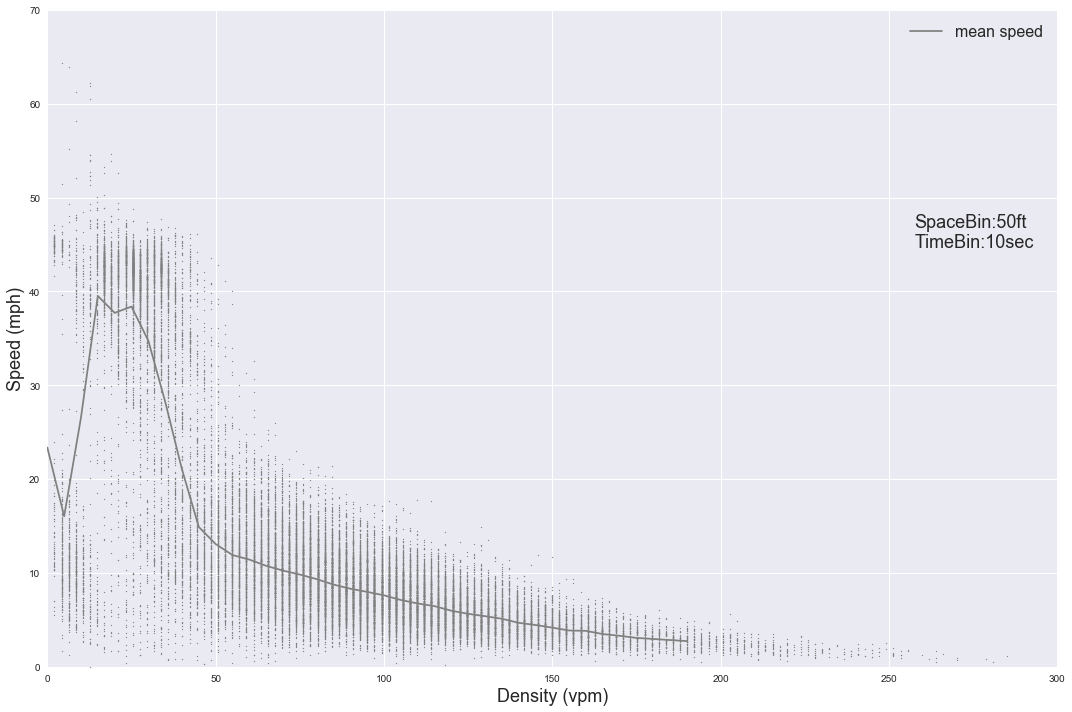

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
ai.plotSpeedVsDensity(fig, ax, color='grey', max_density=300)

In [10]:
ng.recalculateMacroVars(100, 10)
ai.recalculateMacroVars(100, 10)

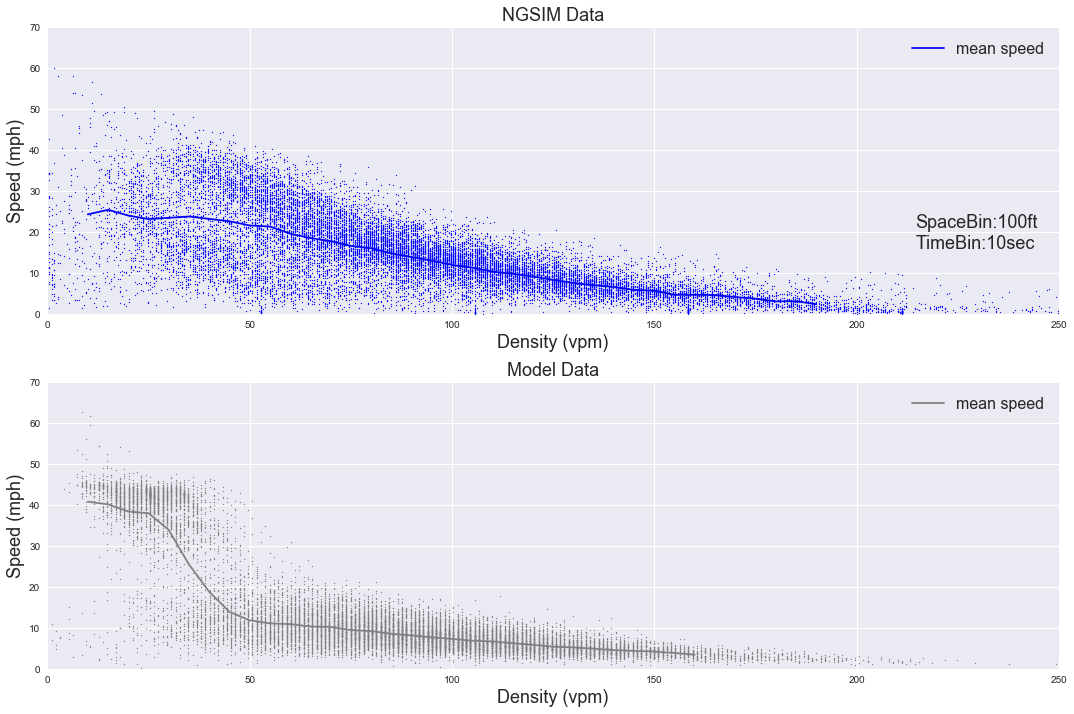

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,10), nrows=2)
ng.plotSpeedVsDensity(fig, ax1, max_density=250)
ai.plotSpeedVsDensity(fig, ax2, color='grey', max_density=250, show_bin_info=False)

ax1.set_title("NGSIM Data", fontsize=18)
ax2.set_title("Model Data", fontsize=18)
fig.tight_layout(pad=1.0, w_pad=0.5, h_pad=1.0)
fig.savefig("/Users/michailxyntarakis/OneDrive/atdm_trajectory/task 6/SpeedvsDensity.png", dpi=150)

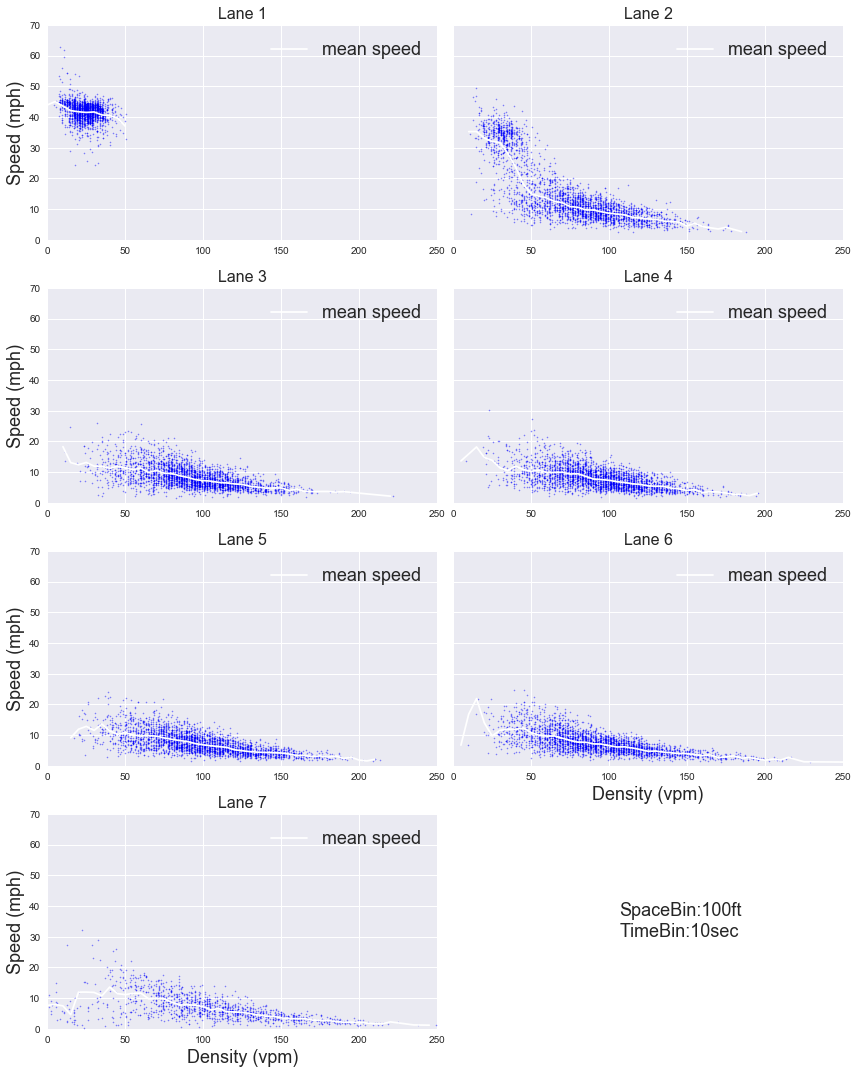

In [15]:
fig, ax = plt.subplots(figsize=(12,15))
ai.plotSpeedVsDensityByLane(fig, plot_mean=True, dot_color='blue', alpha=0.4)
fig.savefig("/Users/michailxyntarakis/OneDrive/atdm_trajectory/task 6/ModelSpeedvsDensityByLane.png", dpi=150)

In [372]:
pd.read_clipboard()

,Speed(mph),reNGSIM,NGSIM,IV,Model
0,0,0.79,1.02,0.45,1.23
1,5,1.01,1.25,0.63,0.84
2,10,0.90,1.32,0.66,1.05
3,15,0.95,1.37,0.63,1.37
4,20,0.94,1.39,0.60,1.61
5,25,1.15,1.43,0.57,1.44
6,30,1.09,1.50,0.57,0.79
7,35,1.14,1.56,0.55,0.47
8,40,1.13,1.64,0.58,0.24


In [376]:
arms = Out[372]

In [378]:
arms.index = arms.index*5 + 2.5

In [379]:
arms

,Speed(mph),reNGSIM,NGSIM,IV,Model
2.5,0,0.79,1.02,0.45,1.23
7.5,5,1.01,1.25,0.63,0.84
12.5,10,0.90,1.32,0.66,1.05
17.5,15,0.95,1.37,0.63,1.37
22.5,20,0.94,1.39,0.60,1.61
27.5,25,1.15,1.43,0.57,1.44
32.5,30,1.09,1.50,0.57,0.79
37.5,35,1.14,1.56,0.55,0.47
42.5,40,1.13,1.64,0.58,0.24


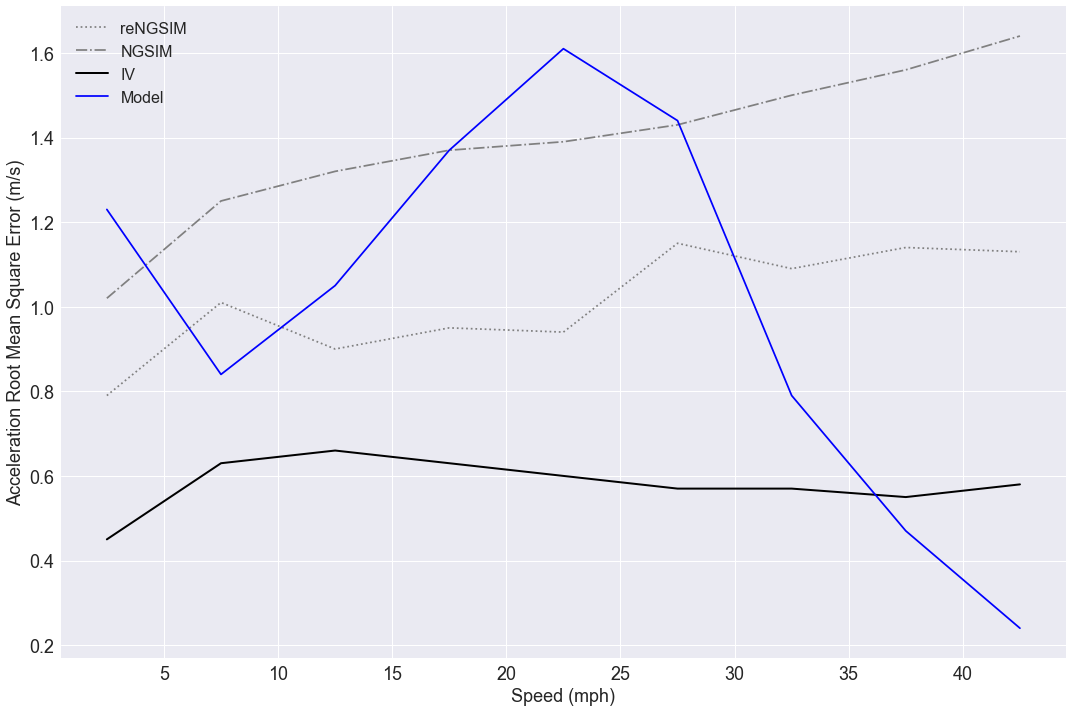

In [395]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(arms.index, arms.reNGSIM, label='reNGSIM', color='grey', ls="dotted")
ax.plot(arms.index, arms.NGSIM, label='NGSIM', color='grey', ls="-.")
ax.plot(arms.index, arms.IV, label='IV', color='black', lw=2)
ax.plot(arms.index, arms.Model, label='Model', color='blue')

ax.set_ylabel("Acceleration Root Mean Square Error (m/s)", fontsize=18)
ax.legend(fontsize=16)
ax.set_xlabel('Speed (mph)', fontsize=18)
fig.tight_layout()
fig.savefig("/Users/michailxyntarakis/OneDrive/atdm_trajectory/task 6/ARMS.png", dpi=150)

In [16]:
ng.getNumOfLaneChangesPerLane()

,_lane,NumOfVehiclesLeavingLane,NumOfVehiclesEnteringLane
0,1,57,86
1,2,121,211
2,3,197,252
3,4,275,335
4,5,405,403
5,6,369,558
6,7,445,24


In [17]:
ai.getNumOfLaneChangesPerLane()

,_lane,NumOfVehiclesLeavingLane,NumOfVehiclesEnteringLane
0,1,0,541
1,2,1126,1086
2,3,1730,1755
3,4,1668,1713
4,5,1534,1561
5,6,1261,1259
6,7,795,199


In [18]:
ng.time_bin, ng.space_bin

(10, 50)

In [25]:
ng.df_macro.head()

speed  density
_lane _spacebin _timebin                               
1     0         2005-04-13 17:00:30  29.188636    3.168
                2005-04-13 17:01:00  24.381818    4.224
                2005-04-13 17:01:50  45.565909    1.056
                2005-04-13 17:03:30  26.618182    5.280
                2005-04-13 17:05:00  30.027273    1.056

In [37]:
ng.df.head()

,VehID,FrameID,TotalFrames,GlobalTime,locX,locY,globX,globY,vehLength,vehWidth,...,_lane,_time,_vid,_dt,_leaveLane,_enterLane,_prV,_flV,_spacebin,_timebin
1101100,3,613,1153,1113437626200,28.369,63.998,6042851.531,2133134.762,12.8,6.8,...,3,2005-04-13 17:13:46.200,1,00:00:00.100000,0,0,3584.0,NaN,0,2005-04-13 17:13:00
1101127,3,614,1153,1113437626300,28.370,64.498,6042851.469,2133135.258,12.8,6.8,...,3,2005-04-13 17:13:46.300,1,00:00:00.100000,0,0,3584.0,NaN,0,2005-04-13 17:13:00
1101154,3,615,1153,1113437626400,28.372,65.497,6042851.346,2133136.250,12.8,6.8,...,3,2005-04-13 17:13:46.400,1,00:00:00.100000,0,0,3584.0,NaN,0,2005-04-13 17:13:00
1101181,3,616,1153,1113437626500,28.374,66.498,6042851.223,2133137.243,12.8,6.8,...,3,2005-04-13 17:13:46.500,1,00:00:00.100000,0,0,7.0,NaN,0,2005-04-13 17:13:00
1101209,3,617,1153,1113437626600,28.375,67.256,6042851.143,2133137.889,12.8,6.8,...,3,2005-04-13 17:13:46.600,1,00:00:00.100000,0,0,7.0,3591.0,0,2005-04-13 17:13:00


In [58]:
ng.df_macro.head()

speed  density
_lane _spacebin _timebin                               
1     0         2005-04-13 17:00:00  21.947644   28.864
                2005-04-13 17:01:00  29.432864   22.000
                2005-04-13 17:02:00  40.014952   10.032
                2005-04-13 17:03:00  29.733610   19.976
                2005-04-13 17:04:00  28.538411   20.416

In [74]:
ng.recalculateMacroVars(100, 60)

In [75]:
ng.df_macro.head()

speed  density  \
_lane _spacebin _timebin                                  
1     0         2005-04-13 17:00:00  21.947644   28.864   
                2005-04-13 17:01:00  29.432864   22.000   
                2005-04-13 17:02:00  40.014952   10.032   
                2005-04-13 17:03:00  29.733610   19.976   
                2005-04-13 17:04:00  28.538411   20.416   

                                     numVehiclesLeavingLane  \
_lane _spacebin _timebin                                      
1     0         2005-04-13 17:00:00                  3168.0   
                2005-04-13 17:01:00                     0.0   
                2005-04-13 17:02:00                     0.0   
                2005-04-13 17:03:00                     0.0   
                2005-04-13 17:04:00                     0.0   

                                     numVehiclesEnteringLane  
_lane _spacebin _timebin                                      
1     0         2005-04-13 17:00:00                   3168.0  
                2005-04-13 17:01:00                      0.0  
                2005-04-13 17:02:00                      0.0  
                2005-04-13 17:03:00                      0.0  
                2005-04-13 17:04:00                      0.0

In [91]:
ng.recalculateMacroVars(100, 60)

In [79]:
ai.df_macro.numVehiclesEnteringLane.max()

66528.0

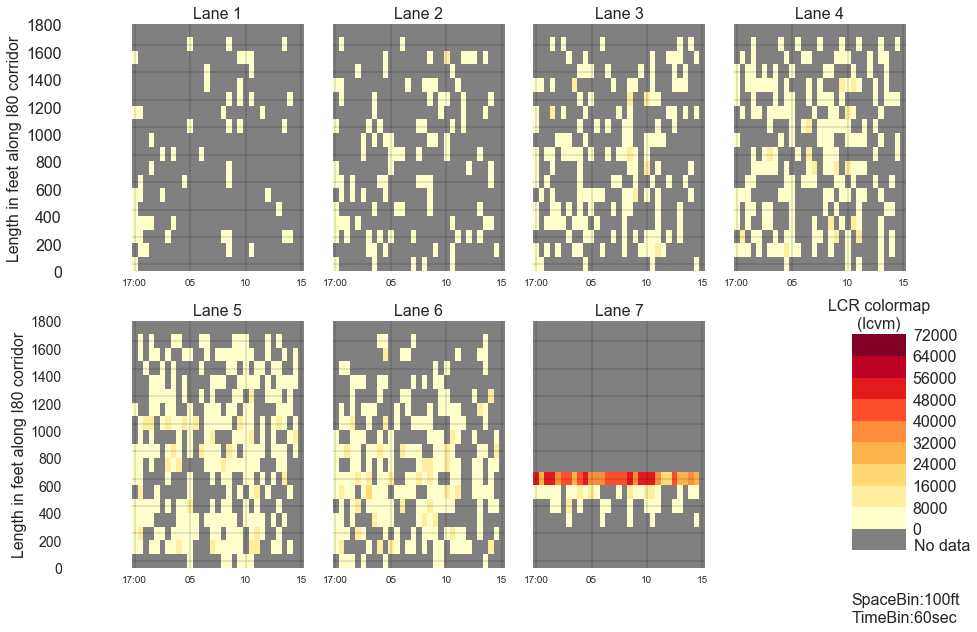

In [123]:
fig, ax = plt.subplots(figsize=(15,10))

ng.plotLCR(fig)

fig.savefig(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\ngLCR_leave.png", dpi=150)

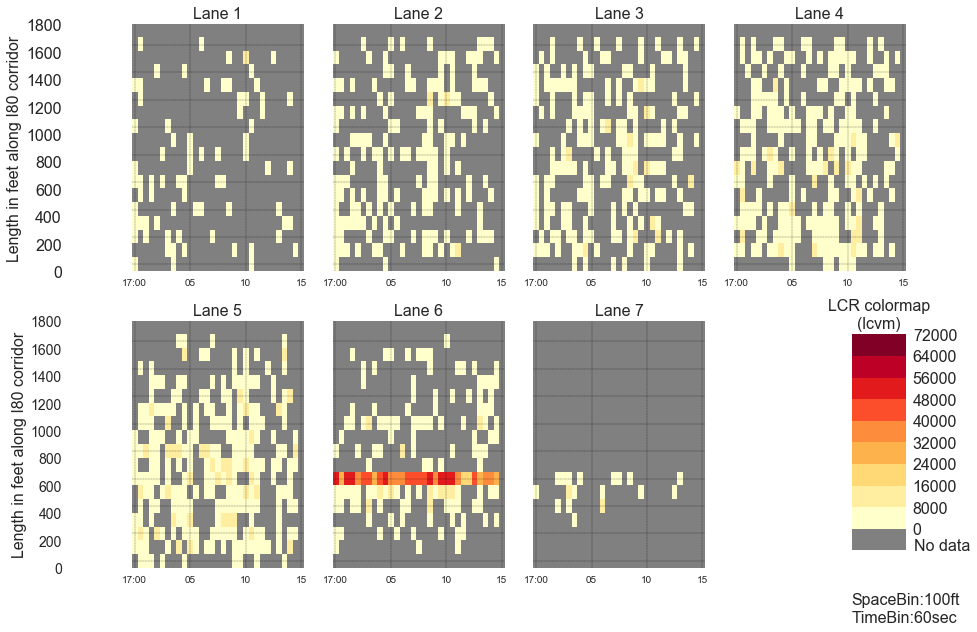

In [122]:
fig, ax = plt.subplots(figsize=(15,10))

ng.plotLCR(fig, laneChangeType='enter')

fig.savefig(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\ngLCR_enter.png", dpi=150)

In [96]:
ai.recalculateMacroVars(100, 60)

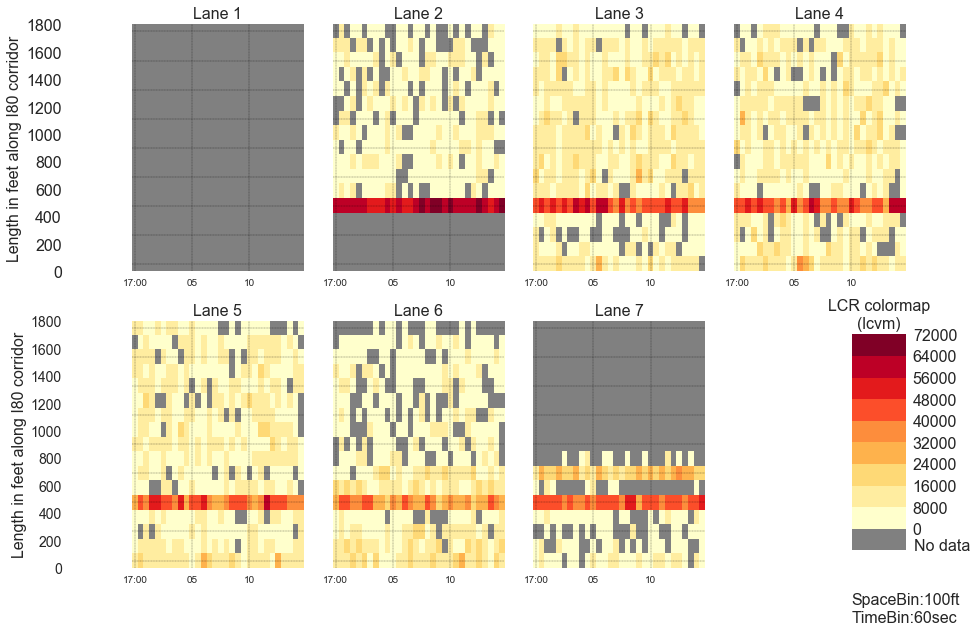

In [121]:
fig, ax = plt.subplots(figsize=(15,10))
ai.plotLCR(fig)
fig.savefig(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\aiLCR_leave.png", dpi=150)

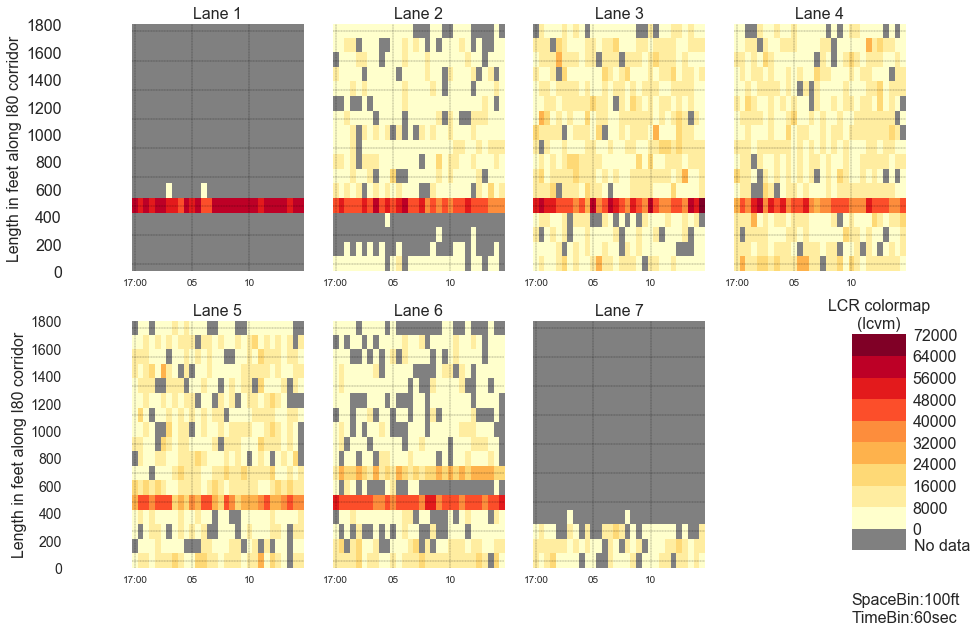

In [120]:
fig, ax = plt.subplots(figsize=(15,10))
ai.plotLCR(fig, laneChangeType='enter')
fig.savefig(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\aiLCR_enter.png", dpi=150)